按照书上的说法，令$\hbar=1, 2m=1, a=1, V_0=10, E=-E_B(E_B>0)$，可得

$$
z_0 = \frac{a}{\hbar}\sqrt{2mV_0} = \sqrt{10}
$$

$$
z = la = \frac{a\sqrt{2m(E+V_0)}}{\hbar} = \sqrt{10-E_B}
$$

薛定谔方程的解为：

- 偶束缚态

$$
\sqrt{10-E_B} \tan \left(\sqrt{10-E_B}\right) = \sqrt{E_B} (even)
$$

- 奇束缚态

$$
\sqrt{10-E_B} \cot \left(\sqrt{10-E_B}\right) = \sqrt{E_B} (odd)
$$


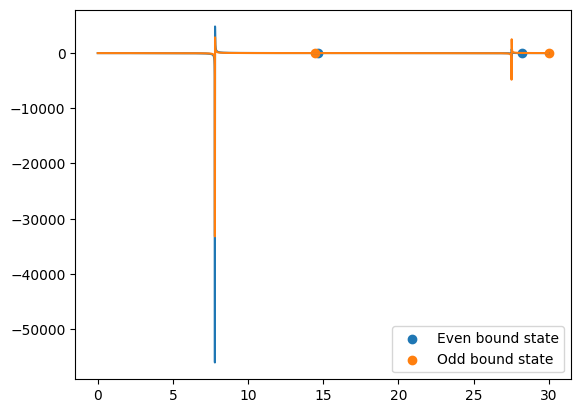

VE =  30
Find  2  Even bound state zero(s):  [14.66605323519298, 28.241113533612765]
Find  2  Odd bound state zero(s):  [14.428806184092611, 29.999999999999964]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


def evenBoundState(x):
    return np.sqrt(VE-x) * np.tan(np.sqrt(VE-x)) - np.sqrt(x)


def oddBoundState(x):
    return np.tan(np.sqrt(VE-x)) * np.sqrt(x) - np.sqrt(VE-x)


def bisection(f, xminus, xplus, Nmax, eps):  # x+, x-, Nmax, error
    for it in range(Nmax):
        xmid = (xplus + xminus) / 2.0   # Mid point
        if (f(xplus) * f(xmid) > 0.):   # Root in left half
            xplus = xmid                # Change x+ to x
        else:                           # Root in left half
            xminus = xmid               # Change x- to x
        if (abs(f(xmid)) < eps):
            # print("\n Root found with precision eps = ", eps)
            return xmid
        if it == Nmax-1:
            # print("\n Root NOT found after Nmax iterations\n")
            return -1


def findZerosAndPlotCurves(f, ve: float, n: int) -> list:
    X = np.linspace(0, ve, n)
    Y = f(X)
    plt.plot(X, Y)

    xZeros = []

    for i in range(0, n-1):
        if f(X[i]) * f(X[i+1]) > 0:
            continue
        else:
            theZero = bisection(f, X[i], X[i+1], imax, eps)
            if theZero != -1:
                xZeros.append(theZero)

    return xZeros


VE = 30  # Energy
N = 100*VE


eps = 1e-6  # Precision of zero
imax = 100  # Max iterations

fig = plt.figure()

evenStateZeros = findZerosAndPlotCurves(evenBoundState, VE, N)
oddStateZeros = findZerosAndPlotCurves(oddBoundState, VE, N)

plt.scatter(evenStateZeros, np.zeros(len(evenStateZeros)), label="Even bound state")
plt.scatter(oddStateZeros, np.zeros(len(oddStateZeros)), label="Odd bound state")


plt.legend(loc='best')
plt.show()

print("VE = ", VE)
print("Find ", len(evenStateZeros), " Even bound state zero(s): ", evenStateZeros)
print("Find ", len(oddStateZeros), " Odd bound state zero(s): ", oddStateZeros)


In [3]:
# set parameters
g = 9.8         # m/s^2
l = 9.8         # length of the pendulum

q = 1/2         # damping factor

Omega_D = 2/3   # driving frequency
F_D = 0         # Driving force

theta0 = 0.2    # initial angle
omega0 = 0.0    # initial angular velocity
t0 = 0.0        # initial time
tf = 60.0       # final time
dt = 0.04       # time step


def euler_cromer_calculate(theta0, omega0, t0, tf, dt):
    """
    :param theta0: initial angle
    :param omega0: initial angular velocity
    :param t0: initial time
    :param tf: final time
    :param dt: time step
    :return: theta, omega, t
    """
    N = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, N)
    theta = np.zeros(N)
    omega = np.zeros(N)
    theta[0] = theta0
    omega[0] = omega0

    for i in range(N-1):
        omega[i+1] = omega[i] - (g/l*np.sin(theta[i]) + q*omega[i] + F_D*np.sin(Omega_D*t[i])) * dt
        # theta[i+1] = (theta[i] + omega[i] * dt + np.pi) % (2 * np.pi) - np.pi  # wrong method
        # theta[i+1] = theta[i] + omega[i+1] * dt
        theta[i+1] = (theta[i] + omega[i+1] * dt + np.pi) % (2 * np.pi) - np.pi  # (theta+pi) % (2*pi) - pi, keeps theta in [-pi, pi]

    return t, theta, omega


In [4]:
# # wrong method
# g = 9.8         # m/s^2
# l = 9.8         # length of the pendulum

# q = 0           # damping factor

# Omega_D = 2/3   # driving frequency
# F_D = 0         # Driving force

# theta0 = 0.2    # initial angle
# omega0 = 0.0    # initial angular velocity
# t0 = 0.0        # initial time
# tf = 60.0       # final time
# dt = 0.04       # time step
# t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
# plt.plot(t, theta, label="theta")
# plt.show()


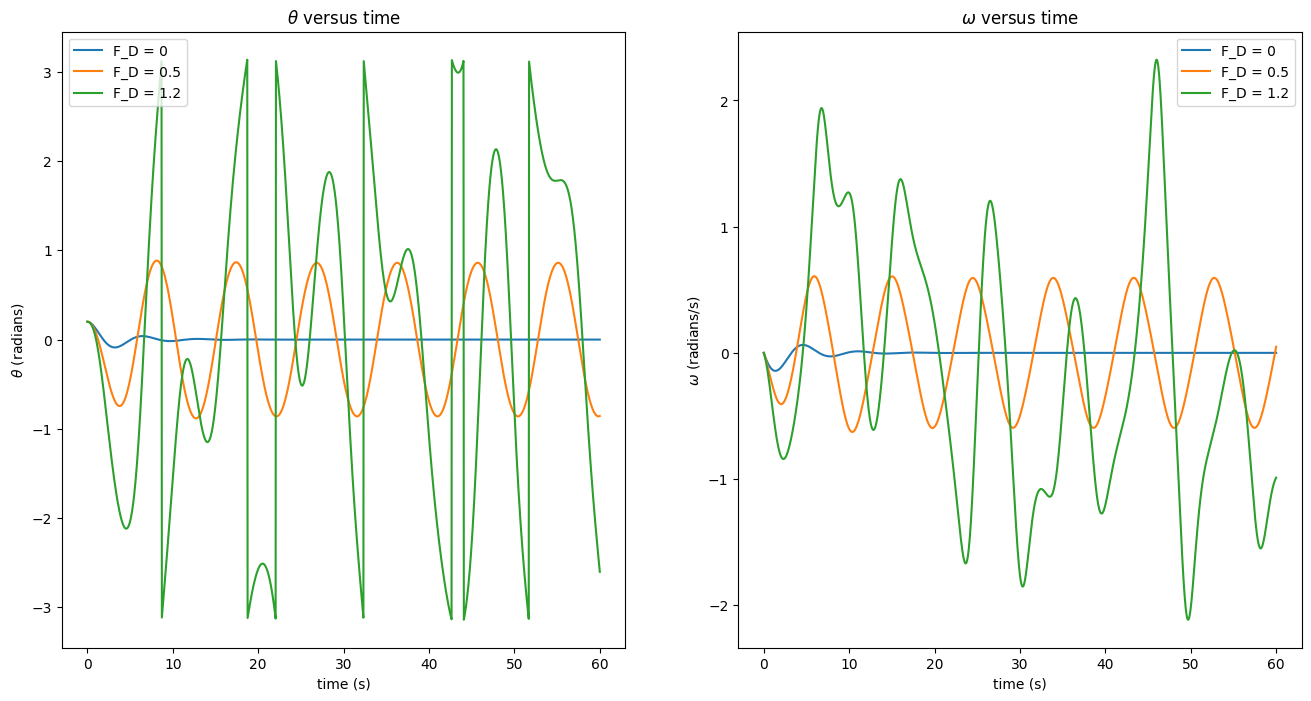

In [5]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))

F_D = 0
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
ax1.plot(t, theta, label="F_D = 0")
ax2.plot(t, omega, label="F_D = 0")

F_D = 0.5
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
ax1.plot(t, theta, label="F_D = 0.5")
ax2.plot(t, omega, label="F_D = 0.5")

F_D = 1.2
t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)
ax1.plot(t, theta, label="F_D = 1.2")
ax2.plot(t, omega, label="F_D = 1.2")

ax1.set_title("$\\theta$ versus time")
ax1.set_xlabel("time (s)")
ax1.set_ylabel("$\\theta$ (radians)")
ax1.legend(loc='best')

ax2.set_title("$\omega$ versus time")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("$\omega$ (radians/s)")
ax2.legend(loc='best')

plt.show()


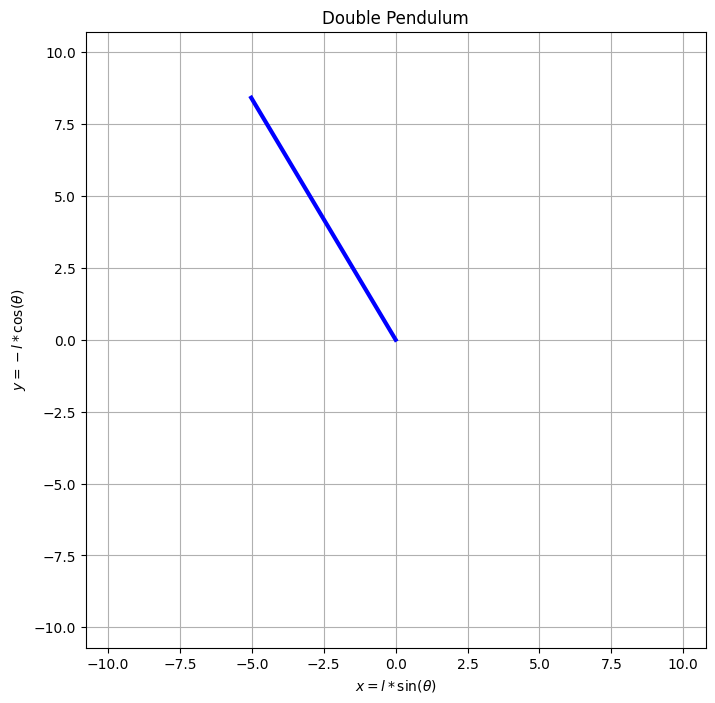

In [13]:
# animation
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("Double Pendulum")
ax.set_xlabel("$x = l*\sin(\\theta)$")
ax.set_ylabel("$y = -l*\cos(\\theta)$")
ax.axis('equal')
ax.set_xlim(-1.1*l, 1.1*l)
ax.set_ylim(-1.1*l, 1.1*l)
ax.grid()

line, = ax.plot([], [], lw=3, color='blue', label="Pendulum")


def init():
    line.set_data([], [])
    return line,


def update(i):
    x = np.sin(theta[i]) * l        # x = l*sin(theta)
    y = -np.cos(theta[i]) * l       # y = -l*cos(theta)
    line.set_data([0, x], [0, y])   # update the line
    return line,


anim = animation.FuncAnimation(fig=fig, func=update, frames=len(t), init_func=init, interval=200, blit=True)
anim.save('double_pendulum.gif', writer='pillow', fps=30)


plt.show()


In [7]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))
ax1.axis('equal')
ax2.axis('equal')


t0 = 0
tf = 60
F_D = 0.5

t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)

ax1.scatter(theta, omega, s=5, label="t from 0 to 60")
ax1.set_title("Phase space plot for $F_D$ = 0.5")
ax1.set_xlabel("$\\theta$ (radians)")
ax1.set_ylabel("$\omega$ (radians/s)")
ax1.legend(loc='best')


t0 = 0
tf = 10000
F_D = 1.2

t, theta, omega = euler_cromer_calculate(theta0, omega0, t0, tf, dt)

ax2.scatter(theta, omega, s=0.01, label="t from 0 to 100000")
ax2.set_title("Phase space plot for $F_D$ = 1.2")
ax2.set_xlabel("$\\theta$ (radians)")
ax2.set_ylabel("$\omega$ (radians/s)")
ax2.legend(loc='best')


plt.show()
